In [1]:
!pip install gql

In [2]:
get_ipython().system(' pip install yelp')

In [3]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sin, cos, sqrt, atan2, radians
from pprint import pprint
from yelp.client import Client
from yelp_api_key import yelp_client_id
from yelp_api_key import yelp_api_key
from urllib.parse import quote



%matplotlib notebook

from pandas.io.json import json_normalize

API_KEY = yelp_api_key
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.

DEFAULT_TERM = "restaurant"
DEFAULT_LOCATION = "1734 E 41 st. Los Angeles, CA 90058"
DEFAULY_DISTANCE = 5
SEARCH_LIMIT = 50

def request(host, path, api_key, url_params=None):
    
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }
    print(u'Querying {0} ...'.format(url))
    response = requests.request('GET', url, headers=headers, params=url_params)
    return response.json()

response = request(host=API_HOST,
                  path=SEARCH_PATH,
                  api_key=API_KEY,
                  url_params={"location":DEFAULT_LOCATION, "term":DEFAULT_TERM, "limit": SEARCH_LIMIT})

pprint(response, indent = 4)

# df = pd.DataFrame.from_dict(json_normalize(response), orient='columns')

# df.head()   

Querying https://api.yelp.com/v3/businesses/search ...
{   'businesses': [   {   'alias': 'trattoria-25-restaurant-vernon',
                          'categories': [   {   'alias': 'italian',
                                                'title': 'Italian'},
                                            {   'alias': 'venues',
                                                'title': 'Venues & Event '
                                                         'Spaces'}],
                          'coordinates': {   'latitude': 34.014241,
                                             'longitude': -118.2305961},
                          'display_phone': '(323) 587-1494',
                          'distance': 1258.2412402252126,
                          'id': '4fjCNwFoUFZqBqwBCbRoXg',
                          'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/MBd3A2bgY3TuruLohV2PTg/o.jpg',
                          'is_closed': False,
                          'location': {   'address1':

                                          'city': 'Los Angeles',
                                          'country': 'US',
                                          'display_address': [   '518 W 7th St',
                                                                 'Los Angeles, '
                                                                 'CA 90014'],
                                          'state': 'CA',
                                          'zip_code': '90014'},
                          'name': 'H&H Brazilian Steakhouse',
                          'phone': '+12132668103',
                          'rating': 4.5,
                          'review_count': 353,
                          'transactions': [   'delivery',
                                              'pickup',
                                              'restaurant_reservation'],
                          'url': 'https://www.yelp.com/biz/h-and-h-brazilian-steakhouse-los-angeles?adjust_creative=Z1PEVlvYcP4

                                             'longitude': -118.241499},
                          'display_phone': '',
                          'distance': 2876.903356739765,
                          'id': 'Dm4veg-FpFsyitImrJXGaA',
                          'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/_j-nHzqyOkEVzrIxeFZIoA/o.jpg',
                          'is_closed': False,
                          'location': {   'address1': '777 S Alameda St',
                                          'address2': '',
                                          'address3': None,
                                          'city': 'Los Angeles',
                                          'country': 'US',
                                          'display_address': [   '777 S '
                                                                 'Alameda St',
                                                                 'Los Angeles, '
                                                           

                                             'longitude': -118.239294},
                          'display_phone': '(323) 233-2770',
                          'distance': 781.7678137275312,
                          'id': '8TUOX9WDdVhpHNtY37gb-g',
                          'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/jirK_TpmJNw95m-afSsHzA/o.jpg',
                          'is_closed': False,
                          'location': {   'address1': '2550 S Alameda St',
                                          'address2': '#F',
                                          'address3': None,
                                          'city': 'Vernon',
                                          'country': 'US',
                                          'display_address': [   '2550 S '
                                                                 'Alameda St',
                                                                 '#F',
                                                        

In [4]:
lat = []
lon = []
business_name =[]
price = []
category = []
transactions = []
rating = []
review_count = []

for i in range(50):
    try:
        lat.append(response["businesses"][i]["coordinates"]["latitude"])
        lon.append(response["businesses"][i]["coordinates"]["longitude"])
        business_name.append(response['businesses'][i]['name'])
        category.append(response['businesses'][i]['categories'][0]['title'])
        transactions.append(response['businesses'][i]['transactions'])
        rating.append(response['businesses'][i]['rating'])
        review_count.append(response['businesses'][i]['review_count'])
        price.append(response['businesses'][i]['price'])
    except:
        price.append("NaN")
        pass
    continue
    
   
print(f"{len(lat)}")
print(f"{len(lon)}")
print(f"{len(business_name)}") 
print(f"{len(price)}") 
print(f"{len(category)}")
print(f"{len(transactions)}")
print(f"{len(rating)}")
print(f"{len(review_count)}")

50
50
50
50
50
50
50
50


In [5]:
print(json.dumps(response, indent = 4, sort_keys = True))

{
    "businesses": [
        {
            "alias": "trattoria-25-restaurant-vernon",
            "categories": [
                {
                    "alias": "italian",
                    "title": "Italian"
                },
                {
                    "alias": "venues",
                    "title": "Venues & Event Spaces"
                }
            ],
            "coordinates": {
                "latitude": 34.014241,
                "longitude": -118.2305961
            },
            "display_phone": "(323) 587-1494",
            "distance": 1258.2412402252126,
            "id": "4fjCNwFoUFZqBqwBCbRoXg",
            "image_url": "https://s3-media3.fl.yelpcdn.com/bphoto/MBd3A2bgY3TuruLohV2PTg/o.jpg",
            "is_closed": false,
            "location": {
                "address1": "2501 S Santa Fe Ave",
                "address2": "",
                "address3": null,
                "city": "Vernon",
                "country": "US",
                "display_ad

In [6]:
total_data = {"Latitude": lat, 
             "Longitude": lon, 
             "Restaurant Name": business_name, 
             "Category": category, 
             "Transactions": transactions, 
             "Rating": rating, 
             "Price Tag":price,
             "Review": review_count,
             }

total_data_df_rename = pd.DataFrame(total_data)
total_data_df_rename_sorted = total_data_df_rename.sort_values(by=["Review"], ascending=True).reset_index(drop=True)

total_data_df_rename_sorted

,Latitude,Longitude,Restaurant Name,Category,Transactions,Rating,Price Tag,Review
0,34.028358,-118.275055,Chop Chop Chicken,Asian Fusion,[],5.0,NaN,1
1,34.033901,-118.241499,Burmese Please,Burmese,[],5.0,NaN,1
2,34.035015,-118.234305,The Ricans Food,Puerto Rican,"[delivery, pickup]",5.0,NaN,3
3,33.959986,-118.246576,Ying Hana Teriyaki,Japanese,[],5.0,NaN,5
4,34.022510,-118.260340,SamSik E,Korean,[],5.0,NaN,6
5,34.033741,-118.241462,Mano Po,Filipino,[],5.0,NaN,7
6,34.041910,-118.255160,9th St Ramen,Ramen,[],5.0,NaN,8
7,34.002441,-118.240555,El Buca Restaurant,Seafood,[],5.0,$,16
8,33.982590,-118.224955,Hana Teppanyaki,Teppanyaki,[delivery],5.0,NaN,26
9,33.975575,-118.186979,Nina’s Cafe Bar,French,[restaurant_reservation],4.5,$$,30


In [7]:
total_data_df_rename_sorted.to_csv("Restaurant_DataFrame.csv", sep = ",")

In [8]:
#approximate radius of earth in miles
r = 3958.8

food_bank_lat = radians(34.007839)
food_bank_lon = radians(-118.241728)

lat1 = radians(34.002441)
lon1 = radians(-118.240555)


distance_lat = food_bank_lat - lat1
distance_lon = food_bank_lon - lon1

a = sin(distance_lat / 2)**2 + cos(lat1) * cos(food_bank_lat) * sin(distance_lon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = r * c

print(f"The distance is:{round(distance,4)} mi")

The distance is:0.379 mi


In [9]:
r = 3958.8

food_bank_lat = radians(34.007839)
food_bank_lon = radians(-118.241728)

distance_in_mi = []

for i in range(50):
    distance_lat = (food_bank_lat) - (radians(total_data_df_rename_sorted["Latitude"][i]))
    distance_lon = (food_bank_lon) - (radians(total_data_df_rename_sorted["Longitude"][i]))
    
    a = sin(distance_lat / 2)**2 + cos(radians(total_data_df_rename_sorted["Latitude"][i])) * cos(food_bank_lat) * sin(distance_lon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = r*c
    
    distance_mi = f"{round(distance, 3)}mi"
    distance_in_mi.append(distance_mi)
    
print(distance_in_mi)


['2.378mi', '1.801mi', '1.925mi', '3.318mi', '1.471mi', '1.79mi', '2.477mi', '0.379mi', '1.992mi', '3.848mi', '2.785mi', '0.483mi', '2.697mi', '0.858mi', '4.98mi', '0.476mi', '1.274mi', '2.74mi', '1.251mi', '2.138mi', '0.444mi', '1.362mi', '1.488mi', '0.776mi', '2.919mi', '1.317mi', '2.806mi', '1.356mi', '2.693mi', '2.193mi', '2.61mi', '3.0mi', '2.126mi', '1.619mi', '2.349mi', '2.941mi', '2.675mi', '1.852mi', '3.347mi', '2.281mi', '2.384mi', '2.844mi', '2.382mi', '2.318mi', '7.015mi', '1.946mi', '3.711mi', '2.895mi', '2.629mi', '2.832mi']


In [10]:
distance_df = pd.DataFrame({"Restaurant Name": business_name, 
                            "Distance to Food Bank(mi)": distance_in_mi, 
                            "Review Count":review_count,
                            "Price Tag": price
                           })
distance_df_sorted = distance_df.sort_values(by=["Distance to Food Bank(mi)"], ascending=True).reset_index(drop=True)
distance_df_sorted

,Restaurant Name,Distance to Food Bank(mi),Review Count,Price Tag
0,The Stanton DTLA,0.379mi,51,$$
1,Rajas con Crema,0.444mi,83,$$
2,Perch,0.476mi,7668,$$$
3,The Ricans Food,0.483mi,3,NaN
4,El Buca Restaurant,0.776mi,16,$
5,Ying Hana Teriyaki,0.858mi,5,NaN
6,Z's Place,1.251mi,89,$$
7,9th St Ramen,1.274mi,8,NaN
8,Bottega Louie,1.317mi,16887,$$
9,Wurstküche,1.356mi,8276,$$


In [11]:
distance_df_sorted.to_csv("Restaurant_Distance.csv", sep = ",")

In [12]:
distance_df_sorted["Distance to Food Bank(mi)"].describe()

count          50
unique         50
top       2.693mi
freq            1
Name: Distance to Food Bank(mi), dtype: object

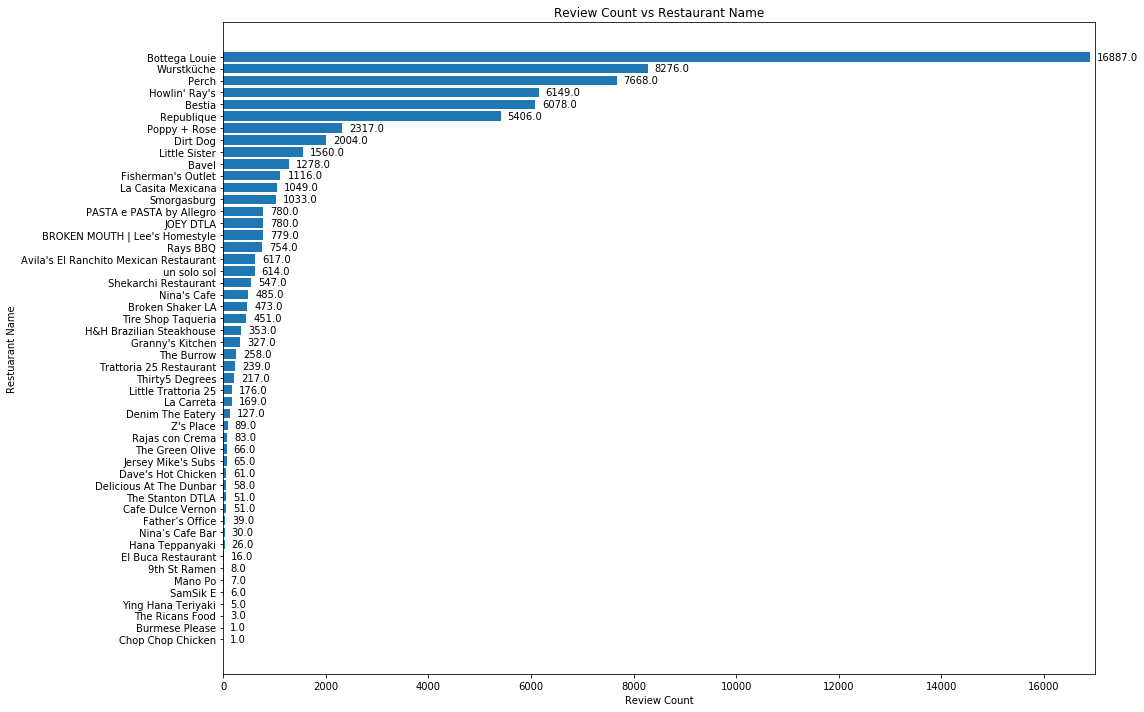

In [41]:
fig, ax = plt.subplots(figsize=(16, 10))

# rating_plot = total_data_df["Rating"]
review_plot = total_data_df_rename_sorted["Review"]
business_name_plot = total_data_df_rename_sorted["Restaurant Name"]

ax.barh(business_name_plot,review_plot)
ax.set_xlabel("Review Count")
ax.set_ylabel("Restuarant Name")

ax.set_xlim(0,17000)

# ax.xaxis.set_tick_params(rotation=90)
ax.set_title("Review Count vs Restaurant Name")

rects = ax.patches

for rect in rects:

    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    
    space = 7
    ha = 'left'

    if x_value < 0:

        space *= -1
        ha = 'right'

    label = "{:.1f}".format(x_value)

    plt.annotate(
        label,                     
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    

fig.tight_layout()

fig.savefig("../Project 1/Plot_1.png")

In [14]:
distance_df_sorted["Price Tag"].value_counts()

$$     29
NaN    12
$       6
$$$     3
Name: Price Tag, dtype: int64

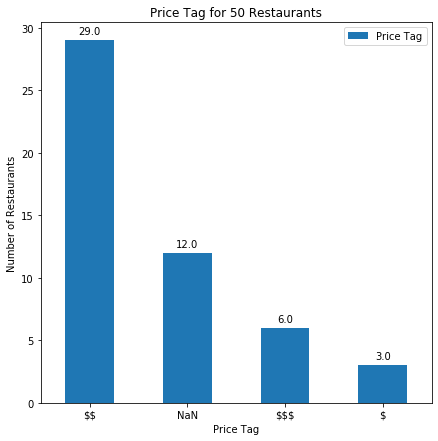

In [21]:
fig, ax = plt.subplots(figsize = (7,7))
fig.canvas.draw()
distance_df_sorted["Price Tag"].value_counts().reset_index().plot(kind='bar', ax=ax);

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = "$\$"
labels[1] = "NaN"
labels[2] = "$\$\$"
labels[3] = "$"

def add_value_labels(ax, spacing=4):

    for rect in ax.patches:
       
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = "bottom"
    
        if y_value < 0:
            space *= -1
            va = "top"
            
        label = "{:.1f}".format(y_value)

        ax.annotate(
            label,                      
            (x_value, y_value),        
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                     
        
add_value_labels(ax)

ax.set_xlabel("Price Tag")
ax.set_ylabel("Number of Restaurants")
ax.set_title("Price Tag for 50 Restaurants")

ax.xaxis.set_tick_params(rotation=0)
ax.set_xticklabels(labels)

fig.savefig("../Project 1/Plot_2.png")
  

In [16]:
rating_df =  pd.DataFrame(total_data_df_rename["Rating"])
rating_df_sorted = rating_df.sort_values(by=["Rating"], ascending=True).reset_index(drop=True)
rating_df_sorted.head()

,Rating
0,3.5
1,4.0
2,4.0
3,4.0
4,4.0


In [18]:
rating_df_sorted["Rating"].value_counts(ascending=True)

3.5     1
5.0    13
4.5    17
4.0    19
Name: Rating, dtype: int64

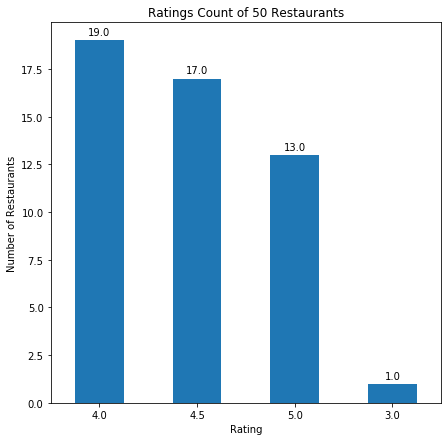

In [19]:
fig, ax = plt.subplots(figsize = (7,7))

fig.canvas.draw()
rating_df_sorted["Rating"].value_counts().plot(kind='bar', ax=ax);

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = "4.0"
labels[1] = "4.5"
labels[2] = "5.0"
labels[3] = "3.0"


def add_value_labels(ax, spacing=3):

    for rect in ax.patches:
       
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = "bottom"
    
        if y_value < 0:
            space *= -1
            va = "top"
            
        label = "{:.1f}".format(y_value)

        ax.annotate(
            label,                      
            (x_value, y_value),        
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                     
        
add_value_labels(ax)

ax.set_xlabel("Rating")
ax.set_ylabel("Number of Restaurants")
ax.set_title("Ratings Count of 50 Restaurants")

ax.xaxis.set_tick_params(rotation=0)
ax.set_xticklabels(labels)

fig.savefig("../Project 1/Plot_3.png")